# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

**Anggota Kelompok :**

**1. Daffa Yudisa Akbar /			NIM. 2241720008**

**2. Hafizh Muhammad Rabbani /	NIM. 2241720242**

**3. Joyo Sugito /				NIM. 2241720050**

**4. Rendy Putra Kusuma /		NIM. 2241720124**

# 2. Gunakan pre-trained model faceNet untuk face recognition


In [6]:
pip install facenet_pytorch

  Using cached facenet_pytorch-2.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached torch-2.2.2-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached torchvision-0.17.2-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia

In [ ]:
import os
import cv2
import numpy as np
from facenet_pytorch import InceptionResnetV1
import torch
import matplotlib.pyplot as plt


train_dir = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train"
test_dir = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Test"


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)


def get_embeddings(dataset_path):
    embeddings = []
    labels = []

    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_path):
            continue

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Skipping invalid image: {image_path}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (160, 160))
            img_tensor = (
                torch.tensor(img_resized)
                .permute(2, 0, 1)
                .unsqueeze(0)
                .float()
                .to(device) / 255.0
            )

            embedding = model(img_tensor).detach().cpu().numpy()
            embeddings.append(embedding)
            labels.append(person_name)

    return np.vstack(embeddings), np.array(labels)


def recognize_face(image_path, embeddings, labels):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
    img_resized = cv2.resize(img_rgb, (160, 160))
    img_tensor = (
        torch.tensor(img_resized)
        .permute(2, 0, 1)
        .unsqueeze(0)
        .float()
        .to(device) / 255.0
    )

    
    face_embedding = model(img_tensor).detach().cpu().numpy()

    
    distances = np.linalg.norm(embeddings - face_embedding, axis=1)
    min_idx = np.argmin(distances)
    min_distance = distances[min_idx]

    
    threshold = 1.0  
    if min_distance < threshold:
        recognized_label = labels[min_idx]
    else:
        recognized_label = "Unknown"

    
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  
    plt.title(f"Prediction: {recognized_label} (Distance: {min_distance:.2f})")  
    plt.show()


print("Extracting embeddings from train dataset...")
train_embeddings, train_labels = get_embeddings(train_dir)

Extracting embeddings from train dataset...


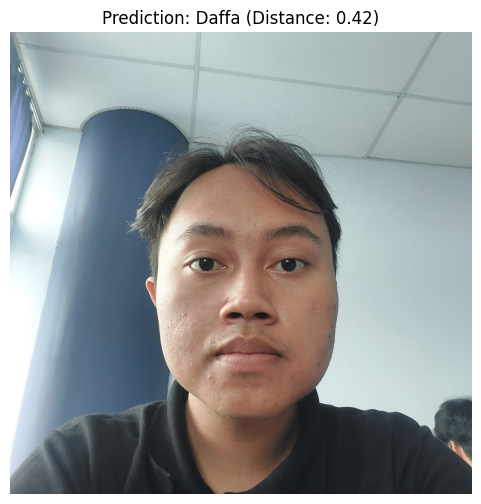

In [8]:
test_image_path = "/content/daffa-test.jpg"
recognize_face(test_image_path, train_embeddings, train_labels)


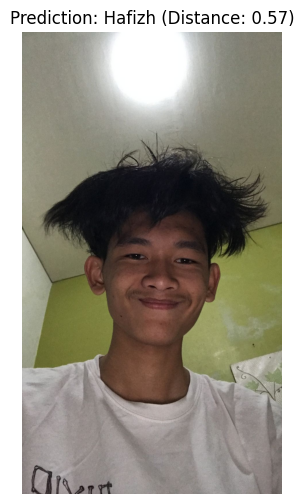

In [9]:
test_image_path = "/content/hafizh-test.jpg"
recognize_face(test_image_path, train_embeddings, train_labels)

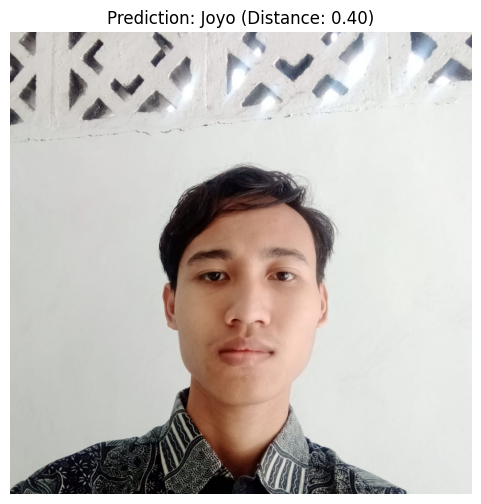

In [11]:
test_image_path = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Test/Joyo/(26).jpg"
recognize_face(test_image_path, train_embeddings, train_labels)

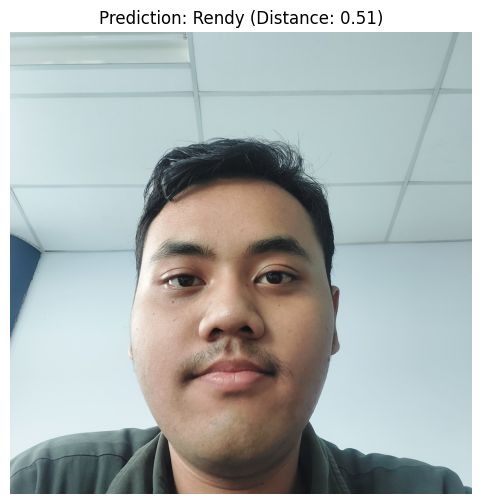

In [7]:
test_image_path = "/content/rendy-test.jpg"
recognize_face(test_image_path, train_embeddings, train_labels)